- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered



In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [3]:
#Read the Data
bikes = pd.read_csv('Bike_sharing.csv')

In [4]:
bikes.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
bikes.shape

(17379, 17)

In [6]:
bikes.size

295443

In [7]:
bikes.describe()

,index,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
bike_prep = bikes.copy()

In [9]:

bike_prep = bike_prep.drop(['index','date','casual','registered'],axis=1)

In [10]:
bike_prep.shape

(17379, 13)

In [11]:
#check the null or missing values
bike_prep.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

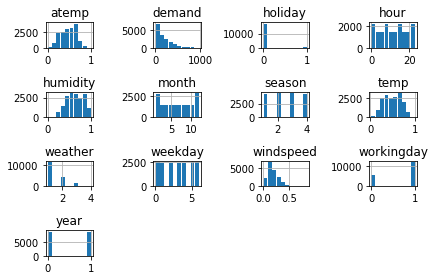

In [12]:
#simple visualization using pandas histogram
bike_prep.hist(rwidth=0.9)
plt.tight_layout()

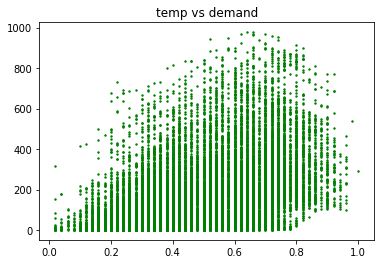

In [13]:
#Data visualization
#visualize the continuous data Vs demand
#plt.subplot(3,3,1)
plt.title('temp vs demand')
plt.scatter(bike_prep['temp'],bike_prep['demand'],s=2,c='g')


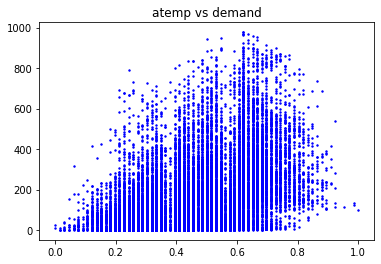

In [14]:
plt.title('atemp vs demand')
plt.scatter(bike_prep['atemp'],bike_prep['demand'],s=2,c='b')

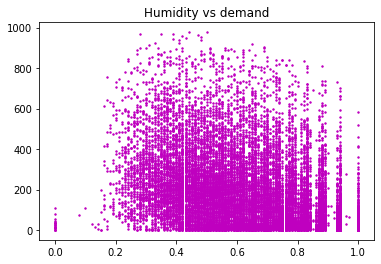

In [15]:
plt.title('Humidity vs demand')
plt.scatter(bike_prep['humidity'],bike_prep['demand'],s=2,c='m')

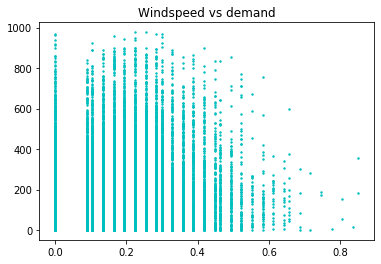

In [16]:
plt.title('Windspeed vs demand')
plt.scatter(bike_prep['windspeed'],bike_prep['demand'],s=2,c='c')

In [17]:
#Visualization of Categorical variable 

cat_list = bike_prep['season'].unique()

In [18]:
cat_list

array([1, 2, 3, 4], dtype=int64)

In [19]:
cat_average = bike_prep.groupby('season').mean()['demand']

In [20]:
cat_average

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: demand, dtype: float64

Text(0.5, 1.0, 'Season Vs Demand')

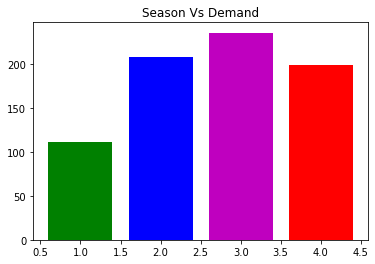

In [21]:
colors =['g','b','m','r']
plt.bar(cat_list,cat_average,color=colors)
plt.title('Season Vs Demand')

Text(0.5, 1.0, 'Month Vs Demand')

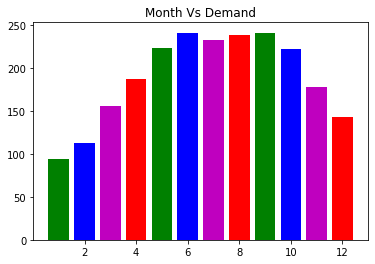

In [22]:
cat_list = bike_prep['month'].unique()
cat_average = bike_prep.groupby('month').mean()['demand']
plt.bar(cat_list,cat_average,color=colors)
plt.title('Month Vs Demand')

Text(0.5, 1.0, 'Holiday Vs Demand')

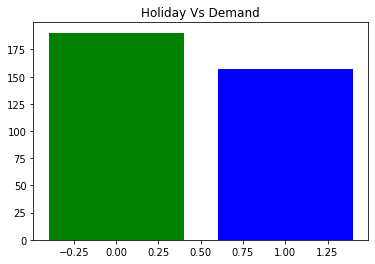

In [23]:
cat_list = bike_prep['holiday'].unique()
cat_average = bike_prep.groupby('holiday').mean()['demand']
plt.bar(cat_list,cat_average,color=colors)
plt.title('Holiday Vs Demand')

Text(0.5, 1.0, 'Hour Vs Demand')

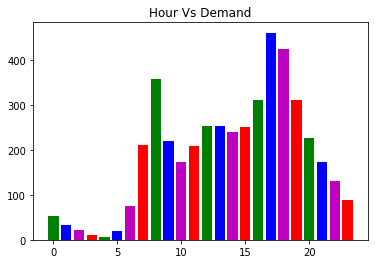

In [24]:
cat_list = bike_prep['hour'].unique()
cat_average = bike_prep.groupby('hour').mean()['demand']
plt.bar(cat_list,cat_average,color=colors)
plt.title('Hour Vs Demand')

Text(0.5, 1.0, 'Weekday Vs Demand')

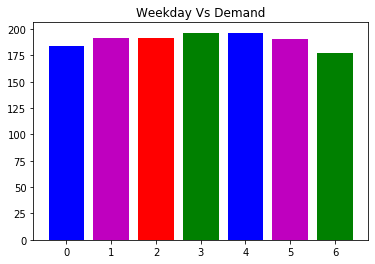

In [25]:
cat_list = bike_prep['weekday'].unique()
cat_average = bike_prep.groupby('weekday').mean()['demand']
plt.bar(cat_list,cat_average,color=colors)
plt.title('Weekday Vs Demand')

Text(0.5, 1.0, 'WorkingDay Vs Demand')

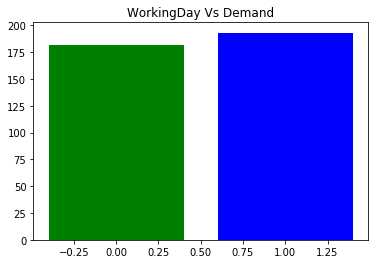

In [26]:
cat_list = bike_prep['workingday'].unique()
cat_average = bike_prep.groupby('workingday').mean()['demand']
plt.bar(cat_list,cat_average,color=colors)
plt.title('WorkingDay Vs Demand')

Text(0.5, 1.0, 'Weather Vs Demand')

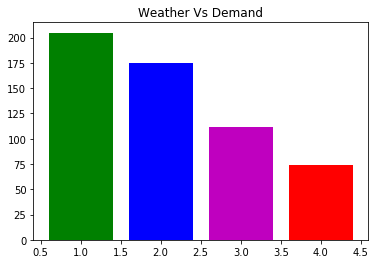

In [27]:
cat_list = bike_prep['weather'].unique()
cat_average = bike_prep.groupby('weather').mean()['demand']
plt.bar(cat_list,cat_average,color=colors)
plt.title('Weather Vs Demand')

Text(0.5, 1.0, 'Year Vs Demand')

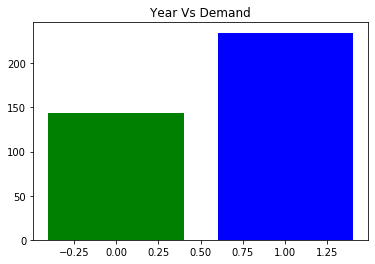

In [28]:
cat_list = bike_prep['year'].unique()
cat_average = bike_prep.groupby('year').mean()['demand']
plt.bar(cat_list,cat_average,color=colors)
plt.title('Year Vs Demand')

In [29]:
bike_prep.shape


(17379, 13)

## Checking for Outliers

In [30]:
bike_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

for outliers we will focus on percentiles
   <br> 50% of the data is in between 40 and 281</br>
     <br>   which is very far from max and mean</br>
 <br>   therefore we will say different quantiles to identify outlier</br>


In [31]:
bike_prep['demand'].quantile([0.05,0.10,0.15,0.90,0.95,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

5% of the time the demand  is less than or == to 5 bike while only 1 % is above than the 782
surely this is an outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x195ee06c848>,
 'caps': [<matplotlib.lines.Line2D at 0x195ee1de3c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x195ee010888>],
 'medians': [<matplotlib.lines.Line2D at 0x195ee057588>],
 'fliers': [<matplotlib.lines.Line2D at 0x195ee057e88>],
 'means': []}

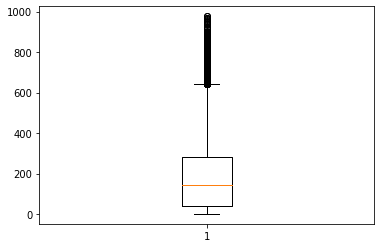

In [32]:
plt.boxplot(bike_prep['demand'])

### Check for Multiple linear regression assumptions
Linearity using correlation coefficient matrix using corr 

In [33]:
correlation =bike_prep[['temp','atemp','humidity','windspeed','demand']].corr()

In [34]:
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


we can see temp amd atemp are highly correlated which violates the multicollinearity rule
so we drop atemp feature
humidity and windspeed  has correlation coefficient is -0.29 which is not a very high value
and other end humidiy has linear correlation with demand is -0.32 and windspeed ,demand has -0.09 which is low so we can drop windspeed

#### Dropping the columns

In [35]:
bike_prep = bike_prep.drop(['windspeed','atemp','weekday','year','workingday'],axis=1)

In [36]:
bike_prep.shape


(17379, 8)

### Check Autocorrelation
for checking autocorrelation values should be float not integer

check autocorrelation in demand using acurr plot

In [37]:
df1=pd.to_numeric(bike_prep['demand'],downcast='float')

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474708, 0.4704955 , 0.49622798, 0.49404052, 0.4679593 ,
        0.47732034, 0.52675766, 0.59145737, 0.6520156 , 0.7151954 ,
        0.80591017, 0.92530966, 1.        , 0.92530966, 0.80591017,
        0.7151954 , 0.6520156 , 0.59145737, 0.52675766, 0.47732034,
        0.4679593 , 0.49404052, 0.49622798, 0.4704955 , 0.45474708],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x195ee170088>)

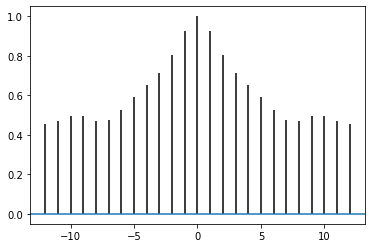

In [38]:
plt.acorr(df1,maxlags=12)

### Log Normalize of demand

In [39]:
df1 = bike_prep['demand']

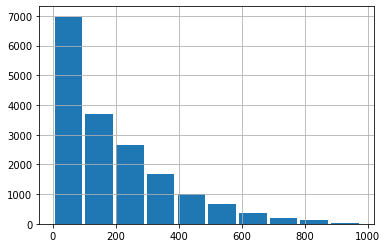

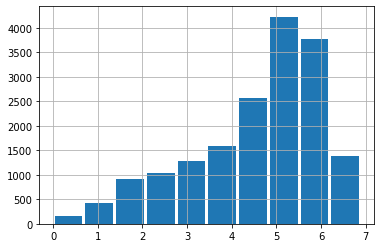

In [40]:
df2= np.log(df1)
plt.figure()
df1.hist(rwidth=0.9)

plt.figure()
df2.hist(rwidth=0.9)

In [41]:
bike_prep['demand']=np.log(bike_prep['demand'])

In [42]:
bike_prep['demand']

0        2.772589
1        3.688879
2        3.465736
3        2.564949
4        0.000000
           ...   
17374    4.779123
17375    4.488636
17376    4.499810
17377    4.110874
17378    3.891820
Name: demand, Length: 17379, dtype: float64

#### Autocorrelation in demand column
solving that problem


In [44]:
t_1=  bike_prep['demand'].shift(+1).to_frame()
t_1.columns=['t-1']

In [45]:
t_2=  bike_prep['demand'].shift(+2).to_frame()
t_2.columns=['t-2']

In [46]:
t_3=  bike_prep['demand'].shift(+3).to_frame()
t_3.columns=['t-3']

In [48]:
bike_prep_lag = pd.concat([bike_prep,t_1,t_2,t_3],axis=1)

In [52]:
bike_prep_lag.head(10)

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
0,1,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000
8,1,1,8,0,1,0.24,0.75,2.079442,1.098612,0.693147,0.000000
9,1,1,9,0,1,0.32,0.76,2.639057,2.079442,1.098612,0.693147


There is null or nan values so we drop that rows

In [53]:
bike_prep_lag = bike_prep_lag.dropna()

### Create Dummy Variables of categorical variables
using get_dummies

In [55]:
dummy_df = pd.get_dummies(bike_prep_lag)

In [56]:
dummy_df.head()

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000


NO change bcoz the data type of the columns are int or float but to create dummies it should be category object or type

In [58]:
bike_prep_lag.dtypes

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

In [59]:
bike_prep_lag['season'] = bike_prep_lag['season'].astype('category')

In [60]:
bike_prep_lag['month'] = bike_prep_lag['month'].astype('category')

In [61]:
bike_prep_lag['hour'] = bike_prep_lag['hour'].astype('category')

In [62]:
bike_prep_lag['holiday'] = bike_prep_lag['holiday'].astype('category')

In [63]:
bike_prep_lag['weather'] = bike_prep_lag['weather'].astype('category')

In [116]:
bike_prep_lag = pd.get_dummies(bike_prep_lag,drop_first=True)

In [117]:
dummy_df.head()

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [118]:
pd.set_option('display.max_columns', None)

In [119]:
dummy_df.head()

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Create Train and Test Split

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
Y = bike_prep_lag[['demand']]
X = bike_prep_lag.drop(['demand'],axis=1)

In [122]:
#### Create training set of 70% of data

In [123]:
tr_size = 0.7 * len(X)

In [124]:
tr_size =int(tr_size)
tr_size

12163

In [125]:
X_train = X.values[0:tr_size]
X_test = X.values[tr_size:len(X)]

In [126]:
Y_train = Y.values[0:tr_size]
Y_test = Y.values[tr_size:len(Y)]

In [127]:
from sklearn.linear_model import LinearRegression

In [128]:
std_reg = LinearRegression()
std_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
r2_train = std_reg.score(X_train,Y_train)
r2_test = std_reg.score(X_test,Y_test)

In [130]:
r2_train

0.9195240591465778

In [131]:
r2_test

0.9287151360253386

In [132]:
Y_predict = std_reg.predict(X_test)

In [133]:
Y_predict

array([[3.21001759],
       [2.86500541],
       [3.21845645],
       ...,
       [4.28217873],
       [4.20477445],
       [3.64981435]])

In [134]:
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(Y_test,Y_predict))

In [135]:
rmse

0.38098800498170426

## Calcaluate the RMSLE

if we open Y_test and Y_predict they are already in logarithmic values therefore before apply rmsle we should we have to convert these values in int or float . As we know exponent is opposite to log therfore we will fine exponent

In [136]:
Y_test_e =[]

In [137]:
Y_predict_e = []

In [138]:
for i in range(0,len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(Y_predict[i]))
    

In [139]:
log_sq_sum = 0.0
#Calculate the sum
for i in range(0,len(Y_test_e)):
    log_a = math.log(Y_test_e[i]+1)
    log_p = math.log(Y_predict_e[i]+1)
    log_diff = (log_p - log_a) **2
    log_sq_sum  = log_sq_sum + log_diff 

In [140]:
rmsle =math.sqrt(log_sq_sum/len(Y_test))

In [141]:
rmsle

0.3560941706980207